## 손실함수와 비용함수의 개념 

손실함수(Loss function)은 머신러닝을 통해 생성한 모형이 실제값과 얼마나 차이가 나는지 즉 손실정도를 수치로 나타내는 함수이다. 모형의 손실은 예측값과 실제값의 차이를 이용해 측정한다.   

손실함수와 비용함수의 차이는 손실함수는 각 데이터 포인트에 대해 예측값과 실제값의 차이를 나타내지만, 비용함수는 데이터 셋 전체를 대상으로 하는 손실을 의미 한다. 

### L1 Loss
실제값과 예측값의 차이에 절대값을 취한것 , 실제값과 예측값의 차이를 줄이는 것이 학습 목적이다.  

L1 Loss와 관련된 비용함수로 MAE(Mean Absolute Error)가 있다. 

$
\text{MAE}(\mathbf{X}, h) = \frac{1}{m}\sum\limits_{i=1}^{m}\left| h(\mathbf{x}^{(i)}) - y^{(i)} \right|
$

MAE는 데이터 셋의 L1 Loss의 평균을 나타내는 비용 함수 

### L2 Loss 
실제값과 예측값의 차이에 제곱을 취한 것   

L2 Loss을 이용한 비용함수는 MSE(Mean Squared Error), RMSE(Root Mean Squared Error)가 존재.  




$
\text{MSE}(\mathbf{X}, h) = {\frac{1}{m}\sum\limits_{i=1}^{m}\left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2}
$



$
\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}\left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2}
$


MSE는 흔히 사용하는 비용함수로 실제갓과 예측값의 차이의 제곱의 평균, RMSE는 MSE에 제곱근을 취한형태이다.  
MSE를 구하는 과정에서 실제값과 예측값을 제곱하므로 MSE는 이상치의 변화에 민감하다. 반면에 MAE나 RMSE는 이상치에 상관없이 안정된 값을 보여준다. 머신러닝 모형의 이상치에 중점을 두고 싶다면 MSE를 사용하고, 그렇지 않으면 MAE나 RMSE를 사용할 수 있다

## 모형 성능 평가

사이킷런에서 사용하는 성능 평가 변수의 네이밍 방법에는 암묵적인 규칙이 존재하는데, 규칙에 따르면 네이밍 방법만 봐도 숫자의 높고 낮음에 따른 성능 해석 방법을 유추할 수 있다. 만약 메소드가 '_score'로 끝난다면 이는 결과값이 클수록 모형 성능이 좋다는 것을 의미한다. 반대로 '_error', '_loss'로 끝난다면 숫자가 작을 수록 좋은 성능을 나타낸다. 

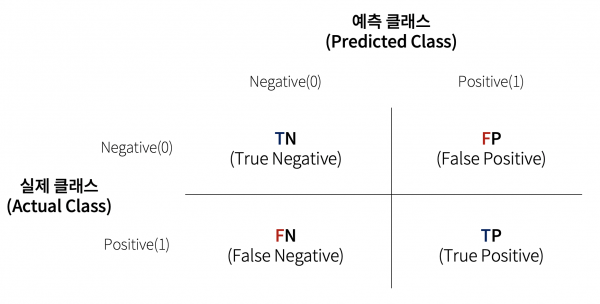

이진분류 문제에서 데이터를 예측값과 실제값에 따라 분류한 표이다.  
예측과 실제 결과가 모두 양성이거나 모두 음서이면 올바르게 예측했으므로 정답으로 분류할 수 있고, 예측값과 실제 결과가 일치하지 않은 경우는 오답으로 분류할 수 있다.   

주어진 데이터를 양성으로 예측했을 때 실제값도 양성인 경우 True Positive , 반대로 음성으로 예측 했는데 실제값도 음성일 경우 True Negative.
양성으로 예측했는데 실제 결과값이 음성으로 나왔을 경우 False Positive (1종오류), 반대로 음성으로 예측 했는데 실제는 양성일 경우 False Negative (2종 오류)라고 한다.


**Equation: Precision**

$
\text{precision} = \cfrac{TP}{TP + FP}
$

양성으로 예측 했을 때 실제로 양성으로 나타나는 비율   




**Equation: Recall, Sensitivity**

$
\text{recall} = \cfrac{TP}{TP + FN}
$

양성에 해당하는 사람이 양성으로 예측되는 비율    
정밀도와 리콜은 비슷하지만 반대되는 개념이다. 정밀도는 양성을 예측했을 때 비율이지만 리콜은 실제로 양성인 경우가 기준  



**Equation: Specificity**

$
\text{specificity} = \cfrac{TN}{FP + TN}
$

실제로 음성에 해당하는 사람이 음성으로 예측되는 경우의 비율  




**Equation: False Positive Rate, FRR**

$
\text{FPR} = 1-Specificity = \cfrac{TN}{FP + TN}
$

실제로 음성에 해당하는 사람이 양성으로 예측되는 경우의 비율   



**Equation: Accuracy**

$
\text{accuracy} = \cfrac{TP + TN}{TP + FP + FN + TN}
$

전체 데이터 중 정답으로 분류되는 비율을 의미 한다.  

**Equation: Error Rate score**

$
\text{accuracy} = \cfrac{FP + FN}{TP + FP + FN + TN}
$

전체 데이터 중 오답으로 분류되는 비율



## 분류문제 에서의 성능 평가 

In [1]:
# 정확도 

from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False)) # normalize = False는 예측값과 실제값이 일치하는 빈도수가 출력 

0.5
2


### Equation: $F_1$ score

$
F_1 = \cfrac{2}{\cfrac{1}{\text{precision}} + \cfrac{1}{\text{recall}}} = 2 \times \cfrac{\text{precision}\, \times \, \text{recall}}{\text{precision}\, + \, \text{recall}} = \cfrac{TP}{TP + \cfrac{FN + FP}{2}}
$


데이터가 inbalance 할때 잘 작동한다.

**정밀도와 재현율 한 쪽에 치우치지 않고 둘 다 균형을 이루는 것**을 나타낸 것이 `F1-Score`이다. F1-Score는 정밀도와 재현율의 조화평균으로 계산할 수 있다.

F1 score는 0부터 1까지 값을 가지며 이는 1에 가까울 수록 높은 성능을 나타낸다. 

조화평균을 사용하는 이유는 precision과 recall이 `0`
 에 가까울수록 F1 score도 동일하게 낮은 값을 갖도록 하기 위함입니다



In [2]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

confusion_matrix를 확인하면 예측값과 실제값의 빈도를 행렬 형태로 확인할 수 있다. 행렬의 행은 실제값, 열은 예측값을 의미한다. 즉 대각 원소는 예측값과 실제값이 일치하는 경우를 의미하며 대각원소가 아닌 원소들은 예측값과 실제값이 차이가 나는 경우이다.

In [3]:
# classification report 

from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



accuracy는 전체 정확도, macro avg는 라벨별 가중치를 부여하지 않은 평균값 ,weighted avg 는 support-weight된 평균값을 의미.  

support는 y_true(실제값)의 클래스별 데이터 개수를 의미

## 회귀문제에서의 성능 평가 

In [4]:
# mean absolute error

from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print(mean_absolute_error(y_true, y_pred))

0.5


In [5]:
# mean squared error

from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))

0.375


In [6]:
# R2

from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(r2_score(y_true, y_pred))

0.9486081370449679


## 군집 문제에서의 성능 평가 

#### 실루엣 스코어 (silhouette score). 

$
\text{s} = \cfrac{b-a}{max(a,b)}
$



서로 다른 군집이 얼마나 잘 분리되는지를 나타내는 지표이다. 이는 같은 군집의 데이터는 가까운 거리에 뭉쳐있고, 다른 군집의 데이터끼리는 멀리 떨어져 있을 수록 높은 점수를 나타낸다.  

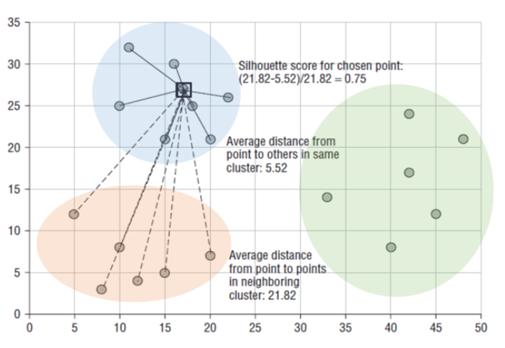

In [7]:
# silloutte score

from sklearn.metrics import silhouette_score

X = [[1, 2], [4, 5], [2, 1], [6, 7], [2, 3]]
labels = [0, 1, 0, 1, 0] 
sil_score = silhouette_score(X, labels)
print(sil_score)

0.5789497702625118


In [8]:
# adjusted rand index

from sklearn.metrics import silhouette_score

X = [[1, 2], [4, 5], [2, 1], [6, 7], [2, 3]]
labels = [0, 1, 0, 1, 0] 
sil_score = silhouette_score(X, labels)
print(sil_score)

0.5789497702625118
